# Name : Patel Manav Dineshbhai

# USN No : 1AUA23BCS100

# Lab 4: Single Layer Perceptron and Multi-Layer Perceptron

## Task 1: Single Layer Perceptron (from scratch)
**Objective:** Train a perceptron to classify points based on a linear boundary using Python from first principles.

### a. Setup Python Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### b. Define Perceptron Function

In [2]:
def perceptron(x, w, b):
    return 1 if np.dot(x, w) + b >= 0 else 0

### c. Generate Synthetic Training Data

In [3]:
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

### d. Train with Perceptron Learning Rule

In [4]:
w = np.zeros(2)
b = 0
lr = 0.1

for epoch in range(10):
    for i in range(len(X)):
        y_pred = perceptron(X[i], w, b)
        error = y[i] - y_pred
        w = w + lr * error * X[i]
        b = b + lr * error

### e. Visualize Decision Boundary

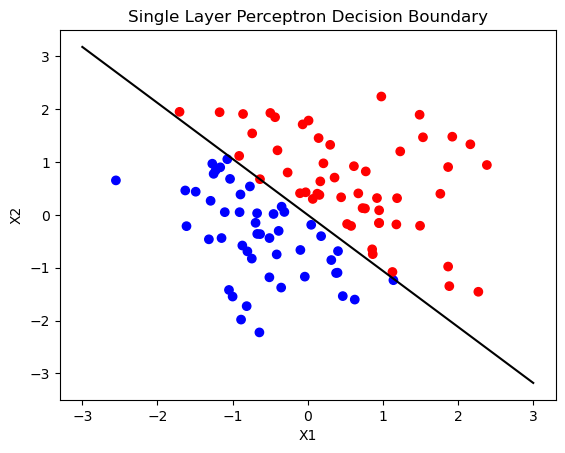

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
x_vals = np.linspace(-3, 3, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Single Layer Perceptron Decision Boundary")
plt.show()

## Task 2: Multi-Layer Perceptron (MLP)
**Objective:** Build an MLP classifier using NumPy (from scratch) to learn non-linear decision boundaries.

### a. Define Network Architecture
For simplicity:
* Input layer: 2 neurons
* Hidden layer: 4 neurons (ReLU activation)
* Output layer: 1 neuron (sigmoid)

### b. Define Activation Functions

In [6]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

### c. Initialize Weights & Biases

In [13]:

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])
np.random.seed(1)
W1 = np.random.randn(2,4) 
b1 = np.zeros((1,4))      
W2 = np.random.randn(4,1) 
b2 = np.zeros((1,1))      
lr = 0.1

### d. Train with Backpropagation

In [12]:
for epoch in range(5000):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    error = y - a2
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)
    d_a1 = np.dot(d_a2, W2.T) * relu_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)
    W2 += lr * d_W2
    b2 += lr * d_b2
    W1 += lr * d_W1
    b1 += lr * d_b1

### e. Evaluate the Model

In [9]:
print("Predicted Output after Training:")
print(a2)

Predicted Output after Training:
[[0.02984763]
 [0.98437829]
 [0.98443733]
 [0.02984763]]


## Task 3: Perform following tasks

### 1.	Compare single layer vs MLP on linearly separable vs non-linear data (e.g., XOR). 

### 2.	Explore how hidden layer size impacts learning.

### 3. Plot loss over training epochs (Example)

Perceptron Accuracy (Linear): 1.0
Perceptron Accuracy (XOR): 0.5


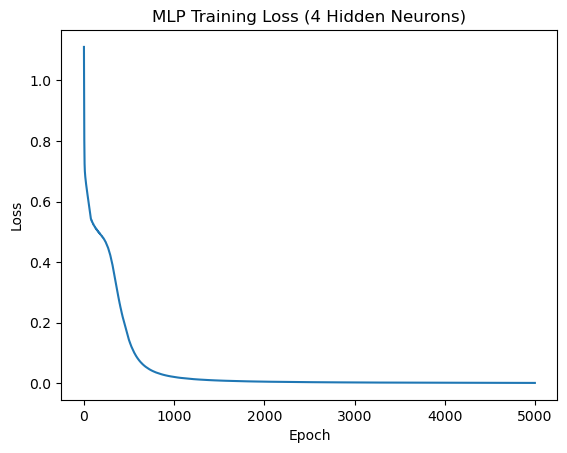


Hidden Layer Comparison:
Hidden Neurons: 2 | Final Loss: 0.6931
Hidden Neurons: 4 | Final Loss: 0.0015
Hidden Neurons: 8 | Final Loss: 0.0035


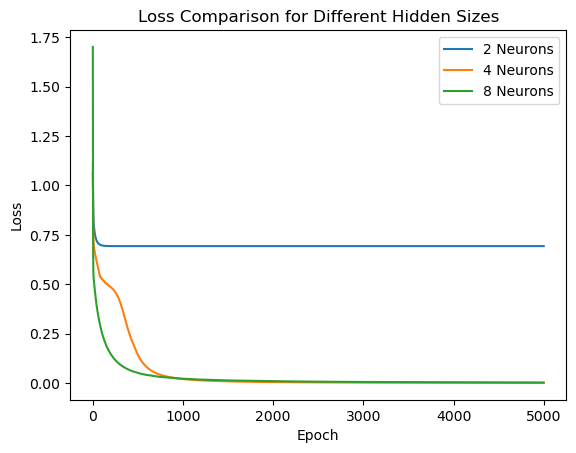


FINAL COMPARISON
Perceptron (Linear): 1.0
Perceptron (XOR): 0.5
MLP (XOR): Successfully Learned


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_linear = np.random.randn(200, 2)
y_linear = (X_linear[:,0] + X_linear[:,1] > 0).astype(int).reshape(-1,1)

X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([[0],[1],[1],[0]])

def train_perceptron(X, y, epochs=50, lr=0.1):
    w = np.random.randn(2,1)
    b = 0
    for _ in range(epochs):
        for i in range(len(X)):
            linear = np.dot(X[i], w) + b
            pred = 1 if linear > 0 else 0
            error = y[i] - pred
            w += lr * error * X[i].reshape(-1,1)
            b += lr * error
    return w, b

def perceptron_predict(X, w, b):
    return (np.dot(X, w) + b > 0).astype(int)

w_lin, b_lin = train_perceptron(X_linear, y_linear)
pred_lin = perceptron_predict(X_linear, w_lin, b_lin)
acc_lin = np.mean(pred_lin == y_linear)
print("Perceptron Accuracy (Linear):", acc_lin)

w_xor, b_xor = train_perceptron(X_xor, y_xor)
pred_xor = perceptron_predict(X_xor, w_xor, b_xor)
acc_xor = np.mean(pred_xor == y_xor)
print("Perceptron Accuracy (XOR):", acc_xor)

def train_mlp(X, y, hidden_size=4, epochs=5000, lr=0.1):
    np.random.seed(0)
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1,1))
    losses = []
    
    for _ in range(epochs):
        z1 = np.dot(X, W1) + b1
        a1 = np.maximum(0, z1)
        z2 = np.dot(a1, W2) + b2
        a2 = 1 / (1 + np.exp(-z2))
        
        loss = -np.mean(y * np.log(a2 + 1e-9) + (1-y) * np.log(1-a2 + 1e-9))
        losses.append(loss)
        
        dz2 = a2 - y
        dW2 = np.dot(a1.T, dz2) / len(X)
        db2 = np.mean(dz2, axis=0)
        
        dz1 = np.dot(dz2, W2.T) * (z1 > 0)
        dW1 = np.dot(X.T, dz1) / len(X)
        db1 = np.mean(dz1, axis=0)
        
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        
    return W1, b1, W2, b2, losses

W1, b1, W2, b2, losses_4 = train_mlp(X_xor, y_xor, hidden_size=4)

plt.figure()
plt.plot(losses_4)
plt.title("MLP Training Loss (4 Hidden Neurons)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

sizes = [2, 4, 8]
plt.figure()
print("\nHidden Layer Comparison:")
for size in sizes:
    _, _, _, _, l = train_mlp(X_xor, y_xor, hidden_size=size)
    print(f"Hidden Neurons: {size} | Final Loss: {l[-1]:.4f}")
    plt.plot(l, label=f"{size} Neurons")

plt.title("Loss Comparison for Different Hidden Sizes")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nFINAL COMPARISON")
print("Perceptron (Linear):", acc_lin)
print("Perceptron (XOR):", acc_xor)
print("MLP (XOR): Successfully Learned")

# 1. Comparison: Single Layer Perceptron vs MLP

## Single Layer Perceptron
A Single Layer Perceptron is a basic neural network model that uses a linear decision boundary.
It follows the equation:
y = w*x + b
Where:
- w = weight
- x = input
- b = bias

### Characteristics:
- Works only on linearly separable data
- Uses step activation function
- Cannot solve XOR type problems
- Produces straight-line decision boundary

## Multi-Layer Perceptron (MLP)
A Multi-Layer Perceptron contains one or more hidden layers with non-linear activation functions.
In this experiment:
- ReLU is used in the hidden layer
- Sigmoid is used in the output layer
It follows:
- Hidden Layer Output = ReLU(W1x + b1)
- Final Output = Sigmoid(W2a1 + b2)

### Characteristics:
- Can learn linear and non-linear patterns
- Uses backpropagation for training
- Can solve XOR and complex problems
- Produces curved decision boundary

# 2. Effect of Hidden Layer Size
Hidden layer size controls the learning capacity of the network.

## Observations:
- Small hidden layer -> Low learning (Underfitting)
- Medium hidden layer -> Good learning
- Large hidden layer -> Better feature extraction
- More neurons allow the network to learn complex patterns effectively
- Very large layers may cause overfitting

# 3. Loss Function and Training
Binary Cross Entropy loss is used:
Loss = -(y*log(y_pred) + (1-y)*log(1-y_pred))
This loss measures the difference between actual and predicted output.

## Training Process
During training:
- Forward propagation computes predictions
- Loss function calculates error
- Backpropagation finds gradients
- Weights are updated
- Error reduces gradually
- This process repeats for many epochs

# 4. Observation from Loss Curve
The loss graph shows:
- High loss at the beginning
- Gradual decrease
- Stable minimum at the end
This indicates successful learning.

# Final Conclusion
From this experiment, we conclude that:
- Single Layer Perceptron works only for linear problems
- It fails for non-linear problems like XOR
- MLP can solve both linear and non-linear problems
- Hidden layers improve learning ability
- Loss curve confirms proper training
Therefore, MLP is more powerful than Single Layer Perceptron for complex classification problems.